# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.rename({'GRADES_8_G':'ENROLL_8'}, axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

Taking a look at the plot below, which graphs 8th grade math scores over time, we can see that the years of data range from about 1990 to 2019, which is 20 years of data. 

Text(0.5, 1.0, '8th Grade Math Score Over Time')

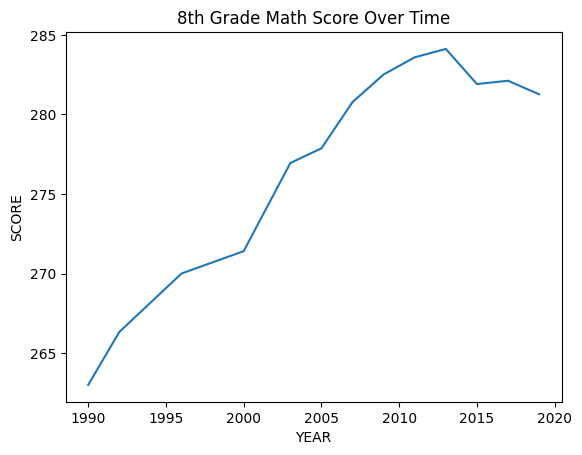

In [4]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

Taking a look at the bar graph which plots the average 8th grade math score for each state, we can see that Ohio has a higher average 8th grade math score across all years compared to Michigan, which is about 282.25 vs 276.17.

Text(0, 0.5, 'SCORE')

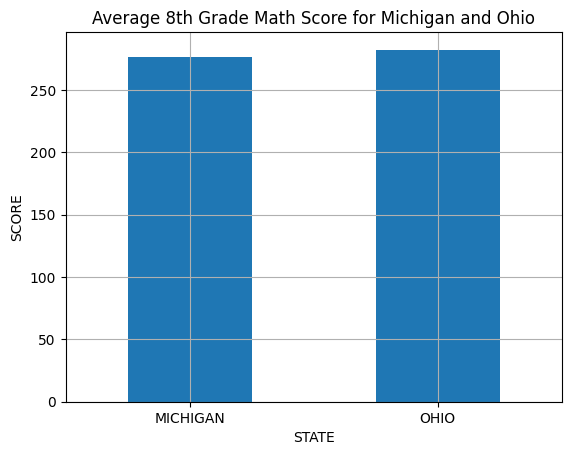

In [5]:
states = df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()
states.iloc[[23,37]].plot.bar(title="Average 8th Grade Math Score for Michigan and Ohio", grid="True", rot=0)
plt.ylabel('SCORE')

Find the average for your outcome score across all states in 2019

The average 8th grade math score across all states in 2019 was about 281.26.

In [6]:
yearly_scores = df.groupby(["YEAR"])["AVG_MATH_8_SCORE"].mean()
yearly_scores

YEAR
1990    263.000000
1992    266.325581
1996    270.000000
2000    271.404762
2003    276.943396
2005    277.867925
2007    280.773585
2009    282.509434
2011    283.584906
2013    284.113208
2015    281.905660
2017    282.113208
2019    281.264151
Name: AVG_MATH_8_SCORE, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

The table below displays each state and the maximum average 8th grade math score across all years for that state.

In [7]:
states = df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()
states

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df['STATE_REVENUE_PER_GRADE_8_STUDENT'] = df['STATE_REVENUE'] / df['ENROLL_8']
df['TOTAL_EXPENDITURE_PER_GRADE_8_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_8']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

The changes that I made were creating two new features, "STATE_REVENUE_PER_GRADE_8_STUDENT" and "TOTAL_EXPENDITURE_PER_GRADE_8_STUDENT" in order to determine whether how much a state makes for each student is correlated with the score they achieve. Likewise, the second feature determines if the total expenditure for each 8th grade student impacts the score they recieve. For instance, if a state makes more money per student or spends more money per student, do they these influence the score the student could achieve? How could the lack of revenue or proper expenditures impact these scores?

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Avg 8th Grade Math Score per 8th Grade Students State Revenue')

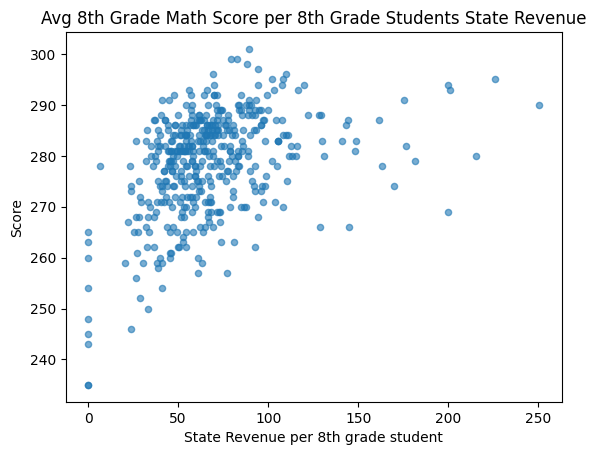

In [9]:
df.plot.scatter(x='STATE_REVENUE_PER_GRADE_8_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('State Revenue per 8th grade student')
plt.ylabel('Score')
plt.title("Avg 8th Grade Math Score per 8th Grade Students State Revenue")

**<CAPTION FOR VIZ 1>**

Fig. 1. Displays the average 8th grade math scores per state revenue for each 8th grade student.

**Visualization 2**

Text(0.5, 1.0, 'Avg 8th Grade Math Score per 8th Grade Student Expenditures')

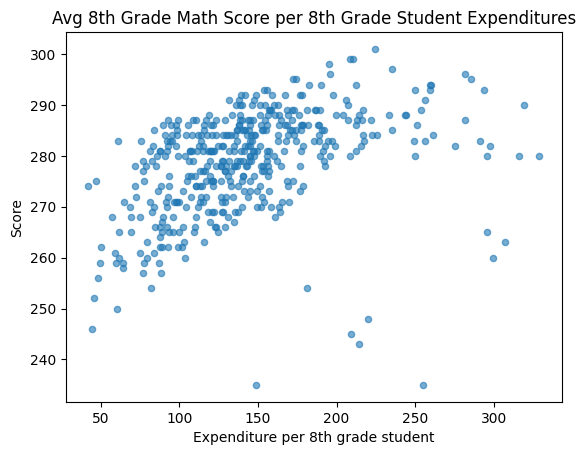

In [10]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_GRADE_8_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Expenditure per 8th grade student')
plt.ylabel('Score')
plt.title("Avg 8th Grade Math Score per 8th Grade Student Expenditures")

**<CAPTION FOR VIZ 2>**

Fig. 2. Displays the average 8th grade math scores for the total expnditure per 8th grade student.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [30]:
# X = 
# y = 
X = df[['ENROLL_8','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [32]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [33]:
# create your model here
# model = 
model = model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [36]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

-15.824177968525134
[2.51928684e-06 1.12546243e+00]
0.8144573639977786
0.6926992243106341
3.7026312124660774


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

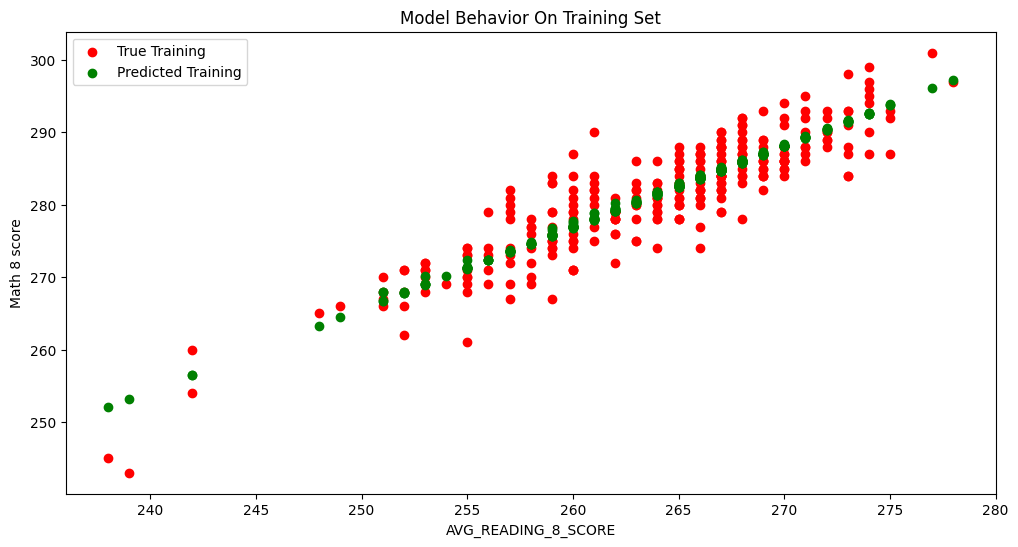

In [41]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

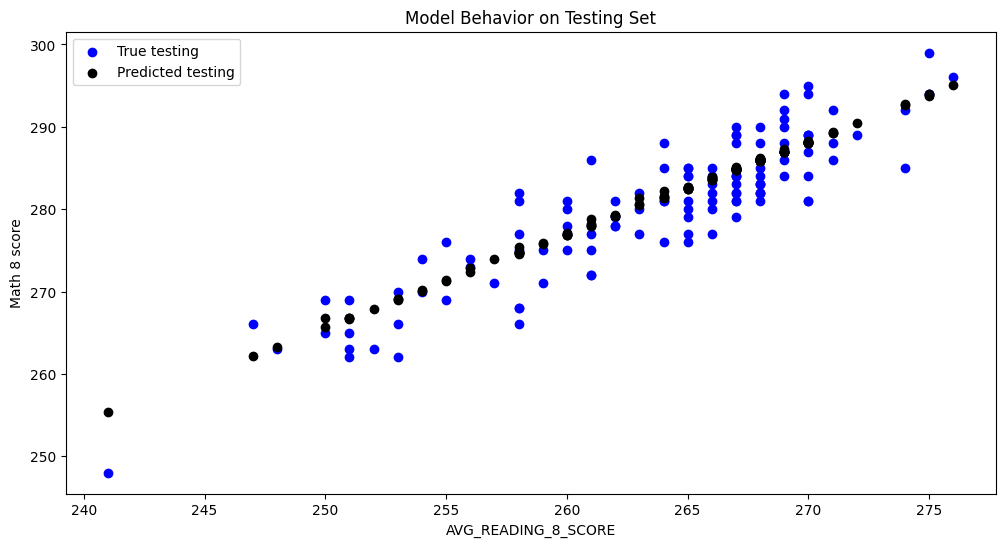

In [40]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

Within checkpoint1, we used the data set "states_edu.csv" in order to analyze the math scores of 8th graders and determine what other variables affect these scores. Through exploratory data analysis, we were able to visualize the average 8th grade math score over the 20 years of data, which showed an increase of about 20pts in scores. Comparing different states with each other, we looked at Michigan scores vs Ohio scores, concluding that Ohio has a higher average 8th grade math score. Additionally, we also explored the average score across all states in 2019 which was about 281.26 as well as determining the maximum score each state had over these 20 years. Looking at feature engineering, two new features were created which look at the state revenue and total expenditure for each 8th grade student. Based on Visual 1, we can see that state revenue per 8th grade student is between \\$40 and \\$100 on average. With this we can see that a lower revenue amount typically has a lower score. Going to Visual 2, the total expenditure per 8th grade student ranged from about \\$80 to \\$200, with the trend of higher spending resulting in a higher score. Lastly, the machine learning linear regression model used predictors from the data of 8th grade enrollments, average 8th grade math scores, and 8th grade reading scores to build a prediction model. Evaluating the model, some metrics we look at are the coefficients the model generates, the R^2 value, and the mean error. Furthermore, we can visualize the model's performance between the training set and the testing set, which showed overfitting with the R^2 value also showing this. Overall, we were able to use various data plots and models in order to explore how 8th grade math scores are impacted and try to predict these scores with different variables. 